# Make sess class for each session and save as pickle

Currently uses info from sessions_dict.py to loop through sessions and create the sess class.

sess pickle files will be named `<scene>_<session>_<scan>.pickle`  \
and saved in `path_dict['preprocessed_root']/sess/<animal>/<date>`.

Set `overwrite` to `True` if you want to overwrite existing .pickle files. Otherwise, you will get an error that the file already exists.

In [1]:
overwrite = True

In [449]:
import os
import glob
import pickle
import numpy as np

import pandas as pd
# import InVivoDA_analyses
import social_int_analyses

# from InVivoDA_analyses import preprocessing as pp
from InVivoDA_analyses import utilities as ut

from social_int_analyses import utilities_ES as u
from social_int_analyses import sleap_utils as slp


import TwoPUtils
from TwoPUtils import preprocessing as pp

from suite2p.io.binary import BinaryFile
from PIL import Image
import PIL

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Specify your path dictionary here.

In [7]:
from social_int_analyses.path_dict_esay import path_dictionary as path_dict
# options: path_dict_josquin, path_dict_msosamac
path_dict

{'preprocessed_root': 'C:/Users/esay/data/social_interaction',
 'sbx_root': 'Z:/giocomo/candong/social_interaction_data/calcium_imaging',
 'VR_Data': 'C:/Users/esay/data/social_interaction\\VRData',
 'git_repo_root': 'C:\\Users\\esay\\repos',
 'TwoPUtils': 'C:\\Users\\esay\\repos\\TwoPUtils',
 'home': 'C:\\Users\\esay',
 'fig_dir': 'Z:/giocomo/candong/social_interaction_data/calcium_imaging\\fig_scratch'}

In [450]:
from social_int_analyses.social_int_sess_deets import social_2P_sessions
from social_int_analyses.social_int_sess_deets import social_mice

In [451]:
mouse = social_mice[2]
d = social_2P_sessions[mouse][0]
print(d)

date, scene, session, scan = d['date'], d['scene'], d['session'], d['scan']
print(scene)

vrdir = path_dict['VR_Data']
basedir = os.path.join(path_dict['sbx_root'], mouse,date,scene)
stem =  os.path.join(basedir, f'{scene}_{session:03}_{scan:03}')
source_folder =  'C:/Users/esay/data/social_interaction/SLEAPData'

if 'diffsex' in scene:
    if 'unrestrict' in scene:
        basedir = os.path.join(path_dict['sbx_root'], mouse,date,'social_unrestrict_nov_diffgender')
        stem = os.path.join(basedir, 'social_unrestrict_nov_diffgender_'f'{session:03}_{scan:03}')
    else:
        basedir = os.path.join(path_dict['sbx_root'], mouse,date,'social_restrict_nov_diffgender')
        stem =os.path.join(basedir, 'social_restrict_nov_diffgender_'f'{session:03}_{scan:03}')

source_stem = os.path.join(source_folder, mouse, date, (scene +'.h5') )

d.update({'mouse': mouse ,
          
          'scan_file':stem + '.sbx',
          'scanheader_file': stem + '.mat',
          'vr_filename': os.path.join("C://Users/esay/data/social_interaction/VRData",mouse,date,"%s_%d.sqlite" %(scene,session)),
          'scan_number': scan,
          'prompt_for_keys': False,
          'VR_only': False,
          'scanner': "NLW",
          'n_channels':2,
          'n_planes':3
             })
source_stem

{'date': '03_10_2024', 'scene': 'social_emptytunnel', 'session': 1, 'scan': 6, 'exp_day': 1, 'mouse': 'social-0921-2', 'scan_file': 'Z:/giocomo/candong/social_interaction_data/calcium_imaging\\social-0921-2\\03_10_2024\\social_emptytunnel\\social_emptytunnel_001_006.sbx', 'scanheader_file': 'Z:/giocomo/candong/social_interaction_data/calcium_imaging\\social-0921-2\\03_10_2024\\social_emptytunnel\\social_emptytunnel_001_006.mat', 'vr_filename': 'C://Users/esay/data/social_interaction/VRData\\social-0921-2\\03_10_2024\\social_emptytunnel_1.sqlite', 'scan_number': 6, 'prompt_for_keys': False, 'VR_only': False, 'scanner': 'NLW', 'n_channels': 2, 'n_planes': 3}
social_emptytunnel


'C:/Users/esay/data/social_interaction/SLEAPData\\social-0921-2\\03_10_2024\\social_emptytunnel.h5'

In [446]:
sess = TwoPUtils.sess.Session(**d)
sess.load_scan_info(sbx_version=3) #check sess.scan_info
sess.align_VR_to_2P()
# depends on vr being loaded already
sess.align_SLEAP_to_2P()
# sess.tunnel_data.shape, sess.vr_data.shape

frame rate 31.25
(17975,) ttl times,(3284,) ca2+ frame times
last time: VR 315.262625, ca2+ 315.168
frame rate 31.25
(17975,) ttl times,(3284,) ca2+ frame times
last time: VR 315.262625, ca2+ 315.168
(1642, 18) (1641, 18)
===filename===
C:/Users/esay/data/social_interaction/SLEAPData\social-0921-2\06_10_2024\social_wheel_restrict.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']



c:\users\esay\repos\twoputils\TwoPUtils\preprocessing.py:374: UserWarning: one frame correction
  warnings.warn('one frame correction')
c:\users\esay\repos\twoputils\TwoPUtils\preprocessing.py:374: UserWarning: one frame correction
  warnings.warn('one frame correction')


dict_keys(['locations', 'head_velocity', 'interaction', 'rightear_x', 'rightear_y', 'tailbase_x', 'tailbase_y', 'nose_x', 'nose_y', 'head_x', 'head_y', 'leftear_x', 'leftear_y', 'torso_x', 'torso_y'])
frame rate 31.25
(17975,) ttl times,(3284,) ca2+ frame times
last time: Tunnel 315.262625, ca2+ 315.168


c:\users\esay\repos\twoputils\TwoPUtils\preprocessing.py:553: UserWarning: one frame correction
  warnings.warn('one frame correction')


In [447]:
TwoPUtils.sess.save_session(sess,'C:/Users/esay/data/social_interaction/SessPkls')

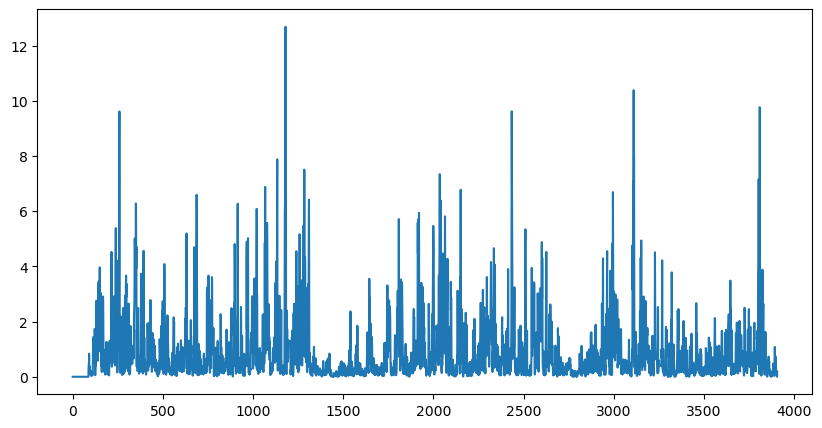

In [377]:
plt.figure(figsize=(10,5))
plt.plot(sess.tunnel_data['head_velocity'])

In [477]:
import dill
mouse = social_mice[0]
d = social_2P_sessions[mouse][2]
date, scene, session, scan = d['date'], d['scene'], d['session'], d['scan']
pkldir = os.path.join('Z:/giocomo/esay/cd_project/social_interaction/SessPkls', mouse,  date, f'{scene}_{session}.pkl')

with open(pkldir, 'rb') as file:
    sess = dill.load(file)

'Z:/giocomo/esay/cd_project/social_interaction/SessPkls\\social-0914-1\\03_10_2024\\social_restrict_fam_1.pkl'

In [479]:
sess.tunnel_data

,head_velocity,interaction,rightear_x,rightear_y,tailbase_x,tailbase_y,nose_x,nose_y,head_x,head_y,leftear_x,leftear_y,torso_x,torso_y,time,pos
0,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,-500.0
1,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096,-500.0
2,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.192,-500.0
3,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288,-500.0
4,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.384,-500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,1.375842,0.0,391.977976,342.289125,294.033530,366.290319,429.877036,324.276702,387.902896,322.064770,374.043845,296.180861,343.944140,333.659437,349.440,-500.0
3641,4.596968,0.0,394.448618,335.557248,288.630078,367.868591,433.895191,323.801865,389.901722,317.430340,372.767896,291.444128,342.012979,331.903530,349.536,-500.0
3642,7.011683,0.0,404.619654,326.953392,302.619304,362.289635,421.171835,295.075024,443.987339,304.144441,454.065621,282.985519,347.962166,332.070933,349.632,-500.0
3643,2.301448,0.0,453.945143,314.201867,305.801105,361.869635,394.451778,247.423158,445.716952,296.052895,411.955443,320.350150,351.973796,330.193480,349.728,-500.0
